In [1]:
import numpy as np
import pandas as pd
import sys
import wfdb
import matplotlib.pyplot as plt
import scipy
%matplotlib notebook

## challenge data

In [19]:
fname = 'A00001'

In [20]:
record = wfdb.rdsamp('data/training2017/{}'.format(fname))

In [13]:
record

(array([[ 0.056],
        [ 0.073],
        [ 0.085],
        ...,
        [-0.064],
        [-0.036],
        [-0.02 ]]),
 {'comments': [],
  'fs': 300,
  'n_sig': 1,
  'sig_len': 18000,
  'sig_name': ['ECG'],
  'units': ['mV']})

In [27]:
record[1]

{'comments': [],
 'fs': 300,
 'n_sig': 1,
 'sig_len': 2714,
 'sig_name': ['ECG'],
 'units': ['mV']}

In [11]:
record[0]

array([[-0.127],
       [-0.162],
       [-0.197],
       ...,
       [-0.018],
       [-0.022],
       [-0.021]])

<IPython.core.display.Javascript object>


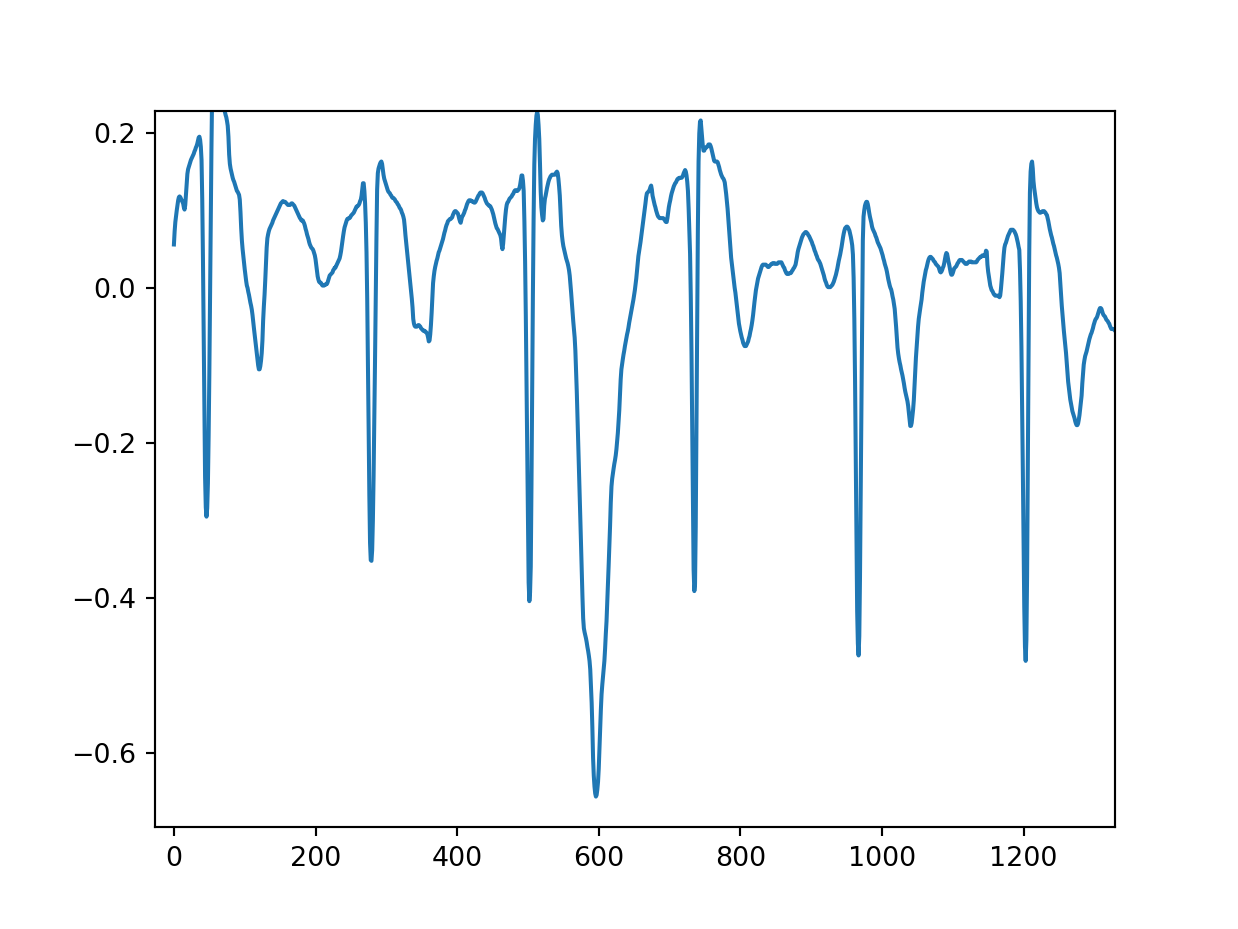

In [14]:
plt.plot(record[0]);

In [24]:
record2 = wfdb.rdrecord('training2017/{}'.format(fname))

In [39]:
idx = record2.adc()/1000==record[0]

In [43]:
foo = np.arange(9000)

In [50]:
foo[~idx.reshape(-1)]

array([], dtype=int32)

### sanity check

In [33]:
lenLst=[]
with open('data/training2017/RECORDS', 'r') as f:
    for fName in f:
        record = wfdb.rdsamp('data/training2017/{}'.format(fName.strip()))
        l = len(record[0])
        record = record[1]
        if record['fs']!=300:
            print(record['fs'])
        if record['n_sig']!=1:
            print(record['n_sig'])
        if record['sig_len']!=l:
            print(record['sig_len'], l)
        lenLst.append(record['sig_len'])
        if record['sig_name']!=['ECG']:
            print(record['sig_name'])
        if record['units']!=['mV']:
            print(record['units'])

In [34]:
len(lenLst)

8528

In [35]:
min(lenLst)

2714

In [36]:
max(lenLst)

18286

<IPython.core.display.Javascript object>


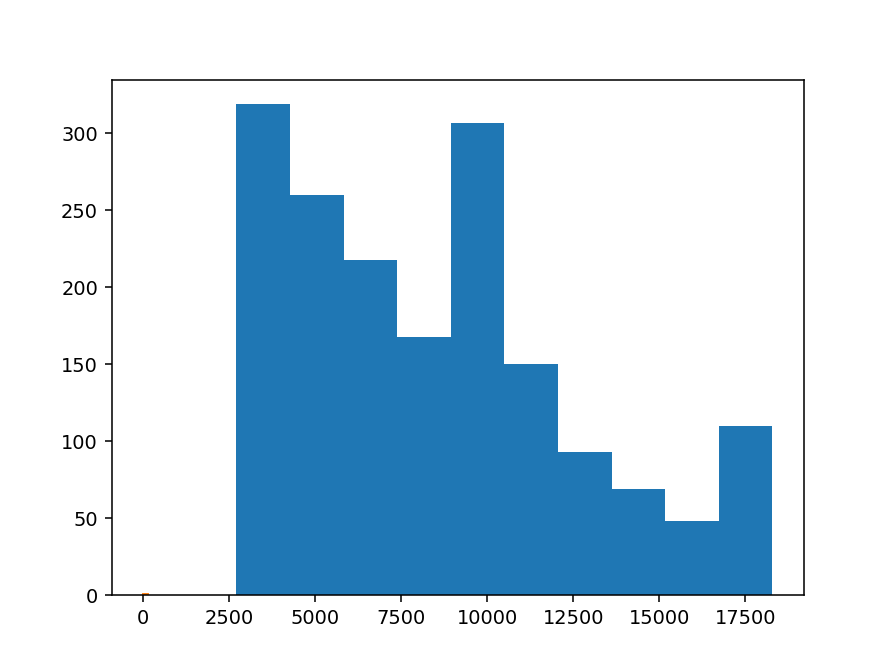

In [50]:
plt.hist(varLst);

In [51]:
varLst

[5570,
 6102,
 11520,
 8694,
 14936,
 17800,
 6542,
 6982,
 14054,
 8141,
 17574,
 3002,
 18170,
 5048,
 7028,
 3760,
 5144,
 17020,
 3028,
 6166,
 3238,
 5866,
 4568,
 6174,
 3306,
 8802,
 5140,
 4072,
 5288,
 13110,
 7240,
 5878,
 5288,
 6054,
 17990,
 12696,
 3742,
 8606,
 8158,
 6878,
 6206,
 4562,
 5478,
 8722,
 6986,
 6016,
 3106,
 5826,
 4414,
 6688,
 17130,
 3898,
 4038,
 3020,
 6344,
 6300,
 15492,
 8162,
 8686,
 7064,
 4492,
 3844,
 3264,
 8326,
 3972,
 12636,
 4622,
 5264,
 5012,
 5544,
 7586,
 7256,
 6230,
 4198,
 3998,
 3846,
 12310,
 9592,
 7800,
 8636,
 8806,
 17390,
 5322,
 3776,
 3044,
 5056,
 2996,
 4220,
 3536,
 5718,
 8172,
 4702,
 5472,
 4130,
 7682,
 6150,
 3858,
 17992,
 5810,
 5520,
 11648,
 3494,
 7934,
 4972,
 9006,
 6716,
 5946,
 15266,
 3964,
 5912,
 4692,
 9508,
 7056,
 17862,
 6140,
 9020,
 3978,
 8288,
 4468,
 10420,
 4028,
 6114,
 4580,
 3256,
 5074,
 7634,
 3560,
 3690,
 5702,
 3682,
 2868,
 10052,
 3038,
 7528,
 4116,
 16714,
 4448,
 5466,
 3846,
 3178

In [46]:
ctr=ctr2=0
varLst=[]
for l in lenLst:
    if l ==9000:
        ctr+=1
    elif l == 18000:
        ctr2+=1
    else:
        varLst.append(l)

In [49]:
(ctr,ctr2)

(5977, 809)

In [52]:
len(varLst)

1742

## MIT vent data

In [47]:
record = wfdb.rdsamp('418')

In [5]:
record

(array([[-0.64 , -0.07 ],
        [-0.91 , -0.065],
        [-0.935, -0.06 ],
        ...,
        [-0.495, -0.245],
        [-0.58 , -0.295],
        [-0.68 , -0.325]]),
 {'comments': [],
  'fs': 250,
  'n_sig': 2,
  'sig_len': 525000,
  'sig_name': ['ECG', 'ECG'],
  'units': ['mV', 'mV']})

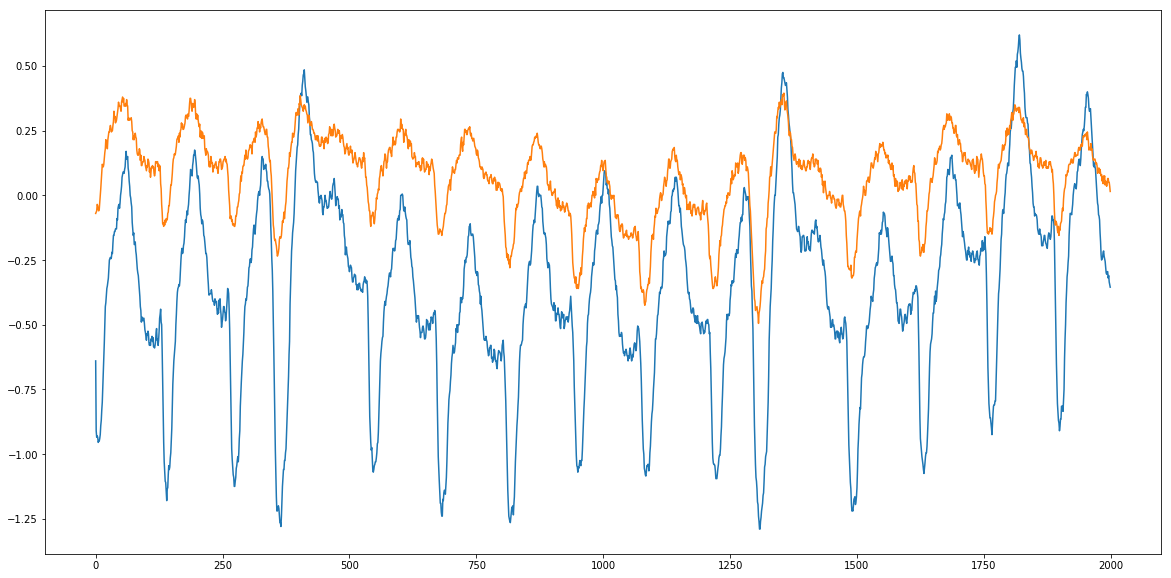

In [6]:
plt.figure(figsize=(20,10))
plt.plot(record[0][0:2000,:]);

In [2]:
ann = wfdb.rdann('418','atr')

In [27]:
wfdb.plot_items(record[0])

TypeError: 'Record' object does not support indexing

In [3]:
record = wfdb.rdrecord('418')

<IPython.core.display.Javascript object>


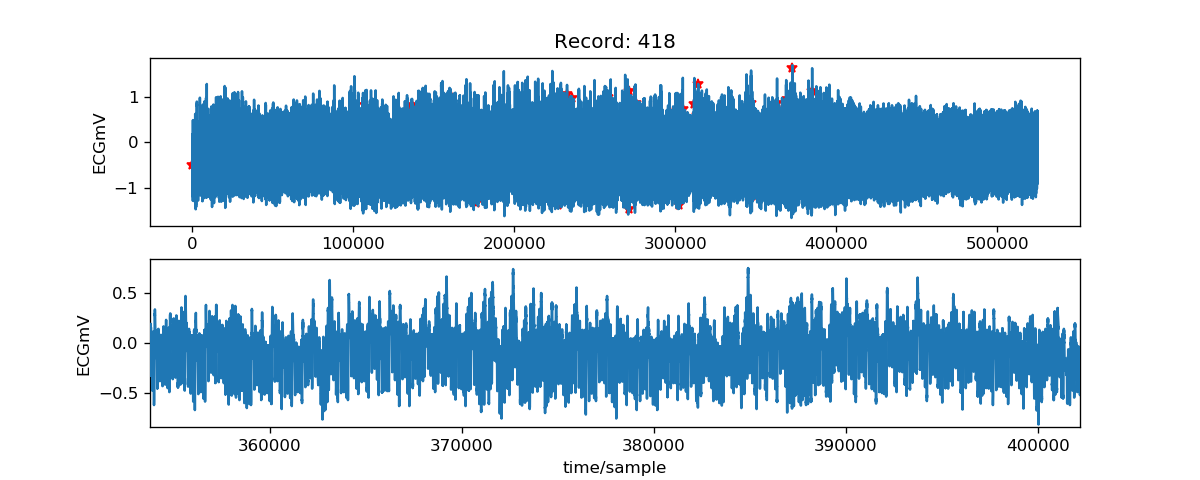

In [4]:
wfdb.plot_wfdb(record,ann,figsize=(10,4))

In [14]:
ann.sample

array([    18,  99624, 101499, 133092, 134038, 135775, 136628, 153057,
       154115, 154942, 156291, 159442, 160516, 169192, 169807, 173054,
       173673, 174788, 175403, 176259, 177868, 190080, 191249, 191807,
       192695, 195631, 196794, 200211, 200634, 216788, 219038, 219961,
       224019, 225355, 226057, 227211, 229269, 231310, 232724, 234499,
       235538, 254230, 255365, 256019, 256884, 257249, 257980, 259557,
       261903, 262749, 263519, 269307, 270999, 271326, 271596, 272057,
       272384, 273673, 275846, 279576, 281384, 289384, 291211, 300480,
       301076, 301525, 301711, 302230, 302538, 302871, 303346, 303641,
       304634, 311442, 311807, 312096, 313480, 313826, 314173, 314493,
       316807, 317237, 317480, 318682, 319769, 327480, 329038, 329365,
       329749, 333826, 334211, 339769, 340019, 346634, 347038, 347403,
       347730, 357634, 358403, 362711, 363115, 367749, 368134, 368583,
       369211, 370153, 370557, 370971, 371653, 372041, 372692, 373076,
      

In [18]:
ann.num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
ann.chan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# downloading

In [28]:
wfdb.get_dbs()

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Challenge 2011 Test Set B'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2013/set-a', 'Challenge 2013 Training Set A'],
 ['challenge/2013/set-b', 

In [30]:
wfdb.get_record_list('mitdb')

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [36]:
wfdb.dl_database('mitdb', 'C:\\Users\\pierrecurie\\Documents\\galvanize\\capstone', records=['100'])

Finished downloading files


In [34]:
pwd

'C:\\Users\\pierrecurie\\Documents\\galvanize\\capstone'

<IPython.core.display.Javascript object>


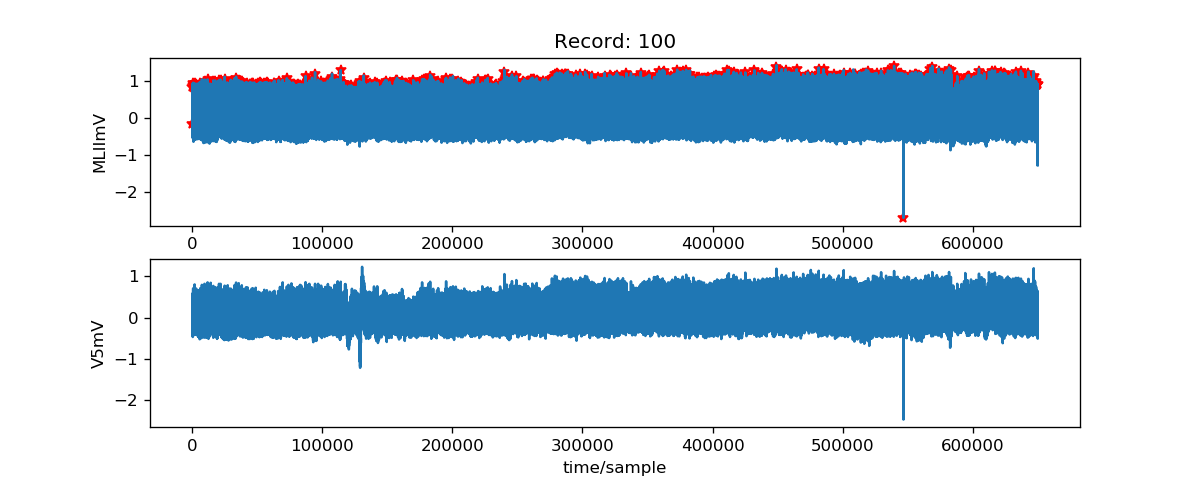

In [38]:
record = wfdb.rdrecord('100')
ann = wfdb.rdann('100','atr')
wfdb.plot_wfdb(record,ann,figsize=(10,4))

### xqrs

In [15]:
from wfdb import processing

In [21]:
xqrs = processing.XQRS(record[0][:,0], record[1]['fs'])

In [22]:
xqrs.detect()

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


<IPython.core.display.Javascript object>


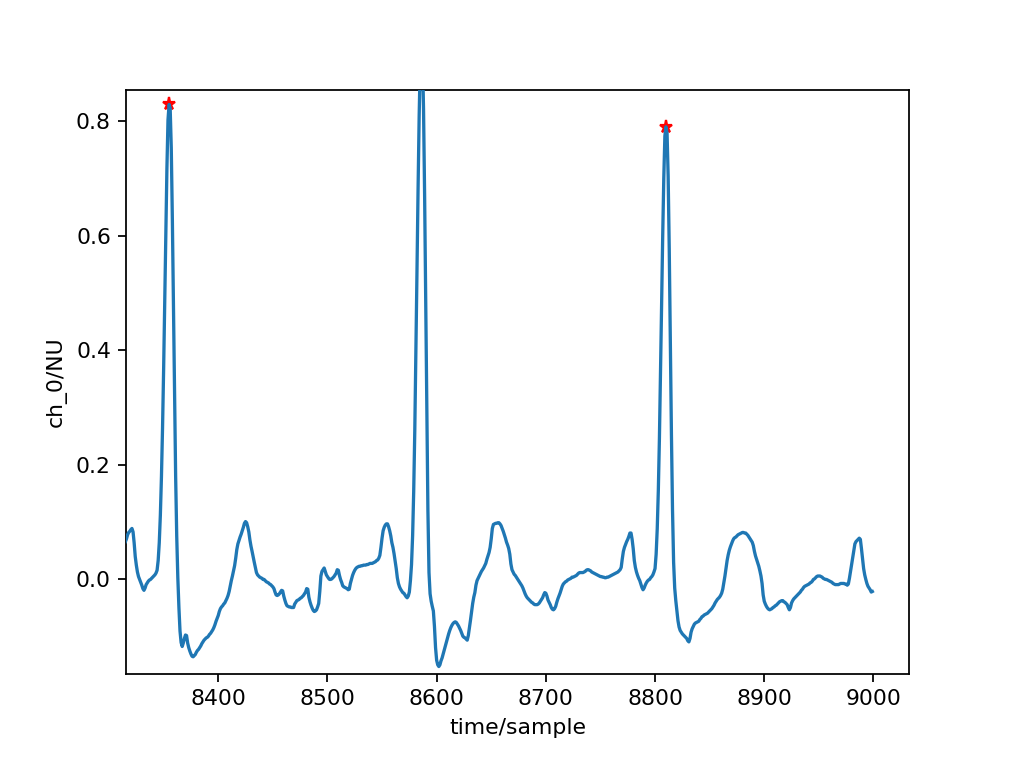

In [23]:
wfdb.plot_items(record[0][:,0], ann_samp=[xqrs.qrs_inds])

<IPython.core.display.Javascript object>


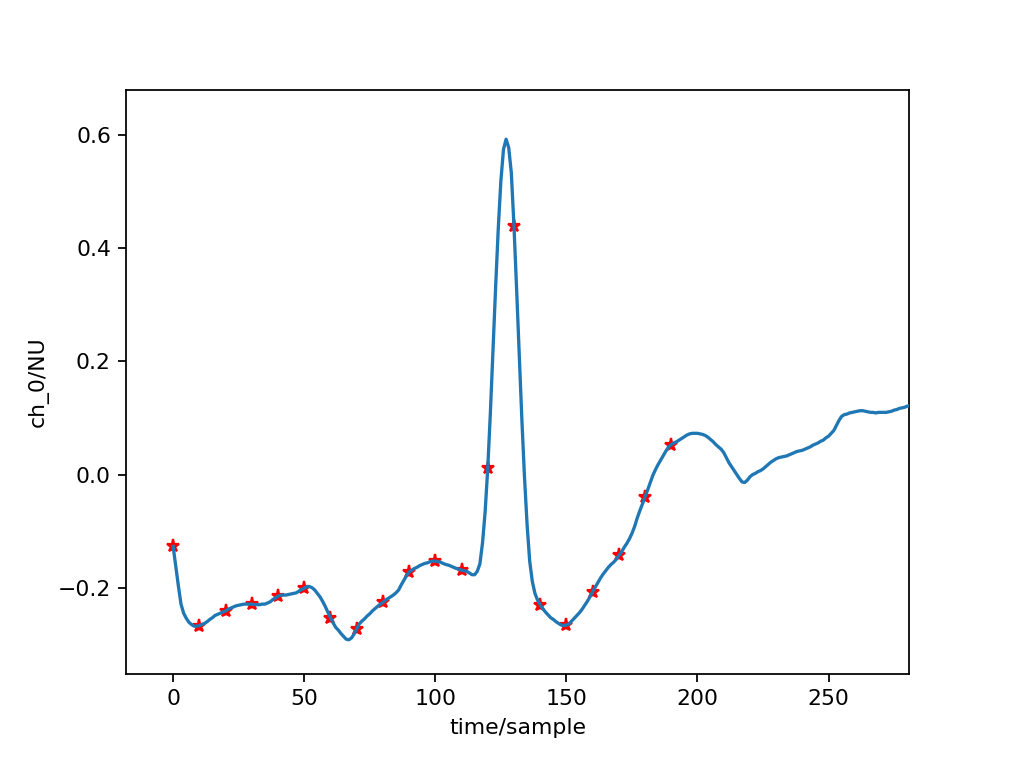

In [42]:
wfdb.plot_items(record[0][:,0], ann_samp=[np.array(range(0,200,10))])

<IPython.core.display.Javascript object>


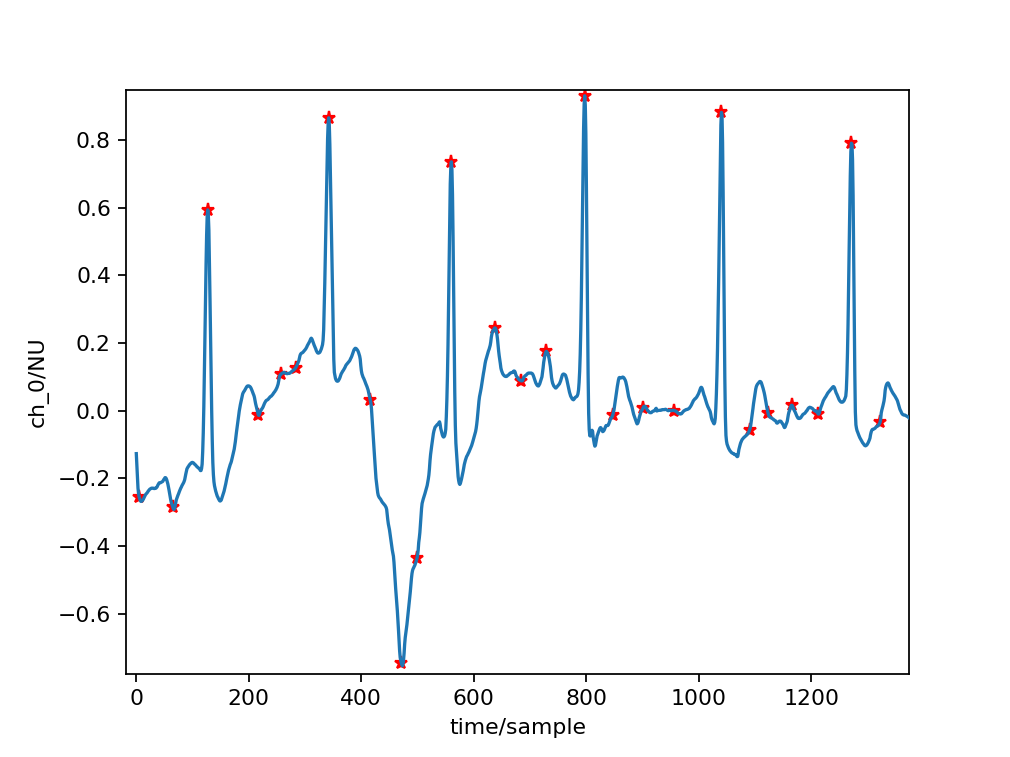

In [52]:
wfdb.plot_items(record[0][:,0], ann_samp=[xqrs.peak_inds_i])

In [55]:
xqrs.qrs_inds

array([ 127,  342,  560,  797, 1040, 1271, 1510, 1754, 1995, 2229, 2470,
       2713, 2951, 3189, 3432, 3679, 3914, 4139, 4370, 4598, 4826, 5044,
       5259, 5484, 5711, 5942, 6164, 6385, 6607, 6827, 7039, 7258, 7481,
       7697, 7909, 8128, 8355, 8586, 8810])

In [57]:
idx = xqrs.qrs_inds
idx2 = idx[1:]-idx[:-1]
idx2

array([215, 218, 237, 243, 231, 239, 244, 241, 234, 241, 243, 238, 238,
       243, 247, 235, 225, 231, 228, 228, 218, 215, 225, 227, 231, 222,
       221, 222, 220, 212, 219, 223, 216, 212, 219, 227, 231, 224])

In [58]:
idx2.mean()

228.5

In [61]:
record[0][idx].reshape(-1)

array([0.593, 0.865, 0.735, 0.93 , 0.881, 0.79 , 0.933, 0.925, 0.874,
       0.464, 0.693, 0.901, 0.851, 0.844, 0.843, 0.869, 0.781, 0.738,
       0.773, 0.803, 0.882, 0.762, 0.805, 0.812, 0.946, 0.813, 0.764,
       0.861, 0.883, 0.8  , 0.811, 0.907, 0.867, 0.783, 0.805, 0.864,
       0.829, 0.942, 0.79 ])

In [66]:
xqrs = processing.XQRS(-record[0][:,0], record[1]['fs'])
xqrs.detect()
idx3 = xqrs.qrs_inds

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


In [68]:
idx-idx3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#insensitive to upside down signal

In [70]:
processing.xqrs_detect(record[0][:,0], record[1]['fs'])-idx

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Misc

In [62]:
from scipy.signal import stft, istft

In [63]:
sig = np.random.randint(0,10,16)

<IPython.core.display.Javascript object>


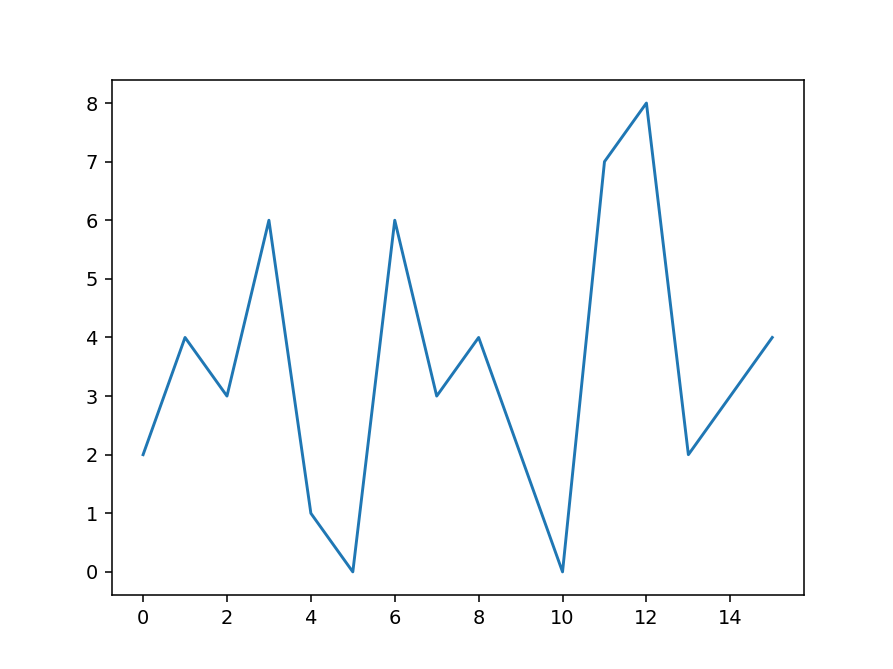

In [70]:
plt.plot(sig)

### IO

In [225]:
foo=np.random.randint(0,10,[20000,2000])

In [226]:
foo

array([[2, 9, 2, ..., 7, 2, 8],
       [8, 1, 2, ..., 1, 8, 9],
       [8, 9, 4, ..., 8, 8, 6],
       ...,
       [9, 6, 1, ..., 4, 9, 6],
       [9, 0, 9, ..., 7, 3, 9],
       [8, 5, 6, ..., 4, 3, 3]])

In [227]:
np.save('np no pck', foo, allow_pickle=False, fix_imports=False)
np.save('np pck', foo, allow_pickle=True, fix_imports=False)

In [219]:
import pickle

In [228]:
with open('pure pck', 'wb') as f:
    pickle.dump(foo,f)

In [230]:
bar=np.load('pure pck')

In [234]:
np.abs(foo-bar).sum()

0

### STFT

In [196]:
_, _, fft = stft(sig, window='boxcar', noverlap=4, nperseg=8,boundary=None)

In [197]:
fft

array([[ 3.125     +0.j        ,  2.875     +0.j        ,
         3.75      +0.j        ],
       [ 0.21338835-0.24371843j, -0.1982233 -0.21966991j,
        -0.76516504+0.10983496j],
       [-0.75      +0.625j     , -0.125     +1.j        ,
         1.125     +0.875j     ],
       [ 0.03661165-0.99371843j, -0.5517767 +1.28033009j,
        -0.23483496-0.64016504j],
       [-0.125     +0.j        , -0.125     +0.j        ,
         0.        +0.j        ]])

<IPython.core.display.Javascript object>


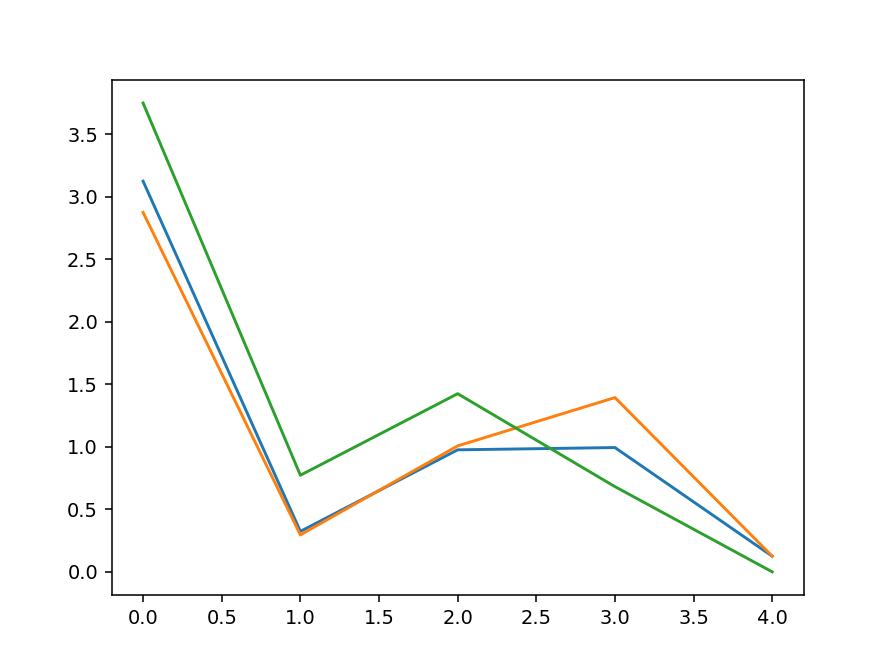

In [198]:
plt.plot(np.abs(fft));

In [205]:
_, sig2=istft(fft, window='boxcar', noverlap=4, nperseg=8,boundary=None)

In [206]:
sig2

array([2.00000000e+00, 4.00000000e+00, 3.00000000e+00, 6.00000000e+00,
       1.00000000e+00, 5.55111512e-17, 6.00000000e+00, 3.00000000e+00,
       4.00000000e+00, 2.00000000e+00, 0.00000000e+00, 7.00000000e+00,
       8.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00])

In [207]:
sig

array([2, 4, 3, 6, 1, 0, 6, 3, 4, 2, 0, 7, 8, 2, 3, 4])

In [208]:
sig-sig2

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.55111512e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [1]:
import sklearn

In [2]:
sklearn.linear_model

AttributeError: module 'sklearn' has no attribute 'linear_model'

In [3]:
from sklearn import linear_model

In [4]:
linear_model

<module 'sklearn.linear_model' from 'C:\\Utility, writing software\\anaconda\\lib\\site-packages\\sklearn\\linear_model\\__init__.py'>